In [54]:
import pylab
import numpy
import re
import matplotlib.pyplot as plt

In [4]:
# функция выигрыша
def pattern(number):
    pattern_00 = r'(\d)'
    pattern_0 = r'(\d{2})'
    if len(str(number)) == 1:
        replace = r'00\1'
        test = re.sub(pattern_00, replace, str(number))
    elif len(str(number)) == 2:
        replace = r'0\1'
        test = re.sub(pattern_0, replace, str(number))
    else:
        test = str(number)
    return test 

def payment(number):
    test = pattern(number)
    #print(test)
    if re.fullmatch(r'777', test):
        return 200 - game_cost
    elif re.fullmatch(r'999', test):
        return 100 - game_cost
    elif re.fullmatch(r'555', test):
        return 50 - game_cost
    elif re.fullmatch(r'333', test):
        return 15 - game_cost
    elif re.fullmatch(r'111', test):
        return 10 - game_cost
    elif re.fullmatch(r'\d77', test):
        return 5 - game_cost
    elif re.fullmatch(r'\d{2}7', test):
        return 3 - game_cost
    elif re.fullmatch(r'\d00', test):
        return 2 - game_cost
    elif re.fullmatch(r'\d{2}0', test):
        return 1 - game_cost
    else:
        return 0 - game_cost 

In [16]:
# цена игры
game_cost = 1

In [46]:
# Количество испытаний
trials = 10000

In [49]:
# Игровой автомат
def slot_mashine(trials):
    values = list(numpy.random.randint(0, 777, size=trials))
    gain = list(map(payment, values))
    win_per_round = sum(gain)/trials
    return win_per_round

slot_mashine(trials)

-0.4722

In [43]:
# подсчитаем мат. ожидание, для этого быстренько автоматизируем вычисление количества вхождения сложных паттернов
# естественно, это несложно насчитать и простыми рассуждениями, но мы сделаем решение в общем виде

def number(test):
    return re.findall(pat, test)

list_a = [x for x in range(0,778)]
list_b = list(map(pattern, list_a))
list_pattern = [r'(\d)77', r'(\d{2})7', r'(\d)00', r'(\d{2})0']

# вероятности для случая "угадай 1 число" тривиальны
p_list = [1/778, 1/778, 1/778, 1/778, 1/778]

# добавим вероятности 4-х нетривиальных случаев
for pat in list_pattern:
    if pat == r'(\d{2})7' or pat == r'(\d)77':
        p_list.append((len(list(filter(None, list(map(number, list_b)))))-1)/778)
    else:
        p_list.append(len(list(filter(None, list(map(number, list_b)))))/778)

        # и вероятность облажаться
fail = (len(list_a) - (5+sum(p_list)))/778
p_list.append(fail)

# Посчитаем по-красоте мат. ожидание, сразу и мапом и лямбдой через 2 списка!
win_list = [200, 100, 50, 15, 10, 5, 3, 2, 1, -1]
M = sum(list(map(lambda x, y: x*y, p_list, win_list)))
round(M, 4)

-0.0486

Примерно в 10 раз меньше накиданного (что, скорее всего, объясняется косяками функции random) но, естественно, отрицательное. Что и следовало ожидать, даже с таким невинным одноруким бандитом мы проигрываем на каждом раунде в теории 5 центов с доллара, на практике - даже больше, 50 центов.

In [72]:
x_coord = [x for x in range(1,1001)]
y_coord = list(map(slot_mashine, x_coord))
y_zero_coord = [0]*len(x_coord)
y_m_coord = []
for i in x_coord:
    y_m_coord.append(round(M, 4))

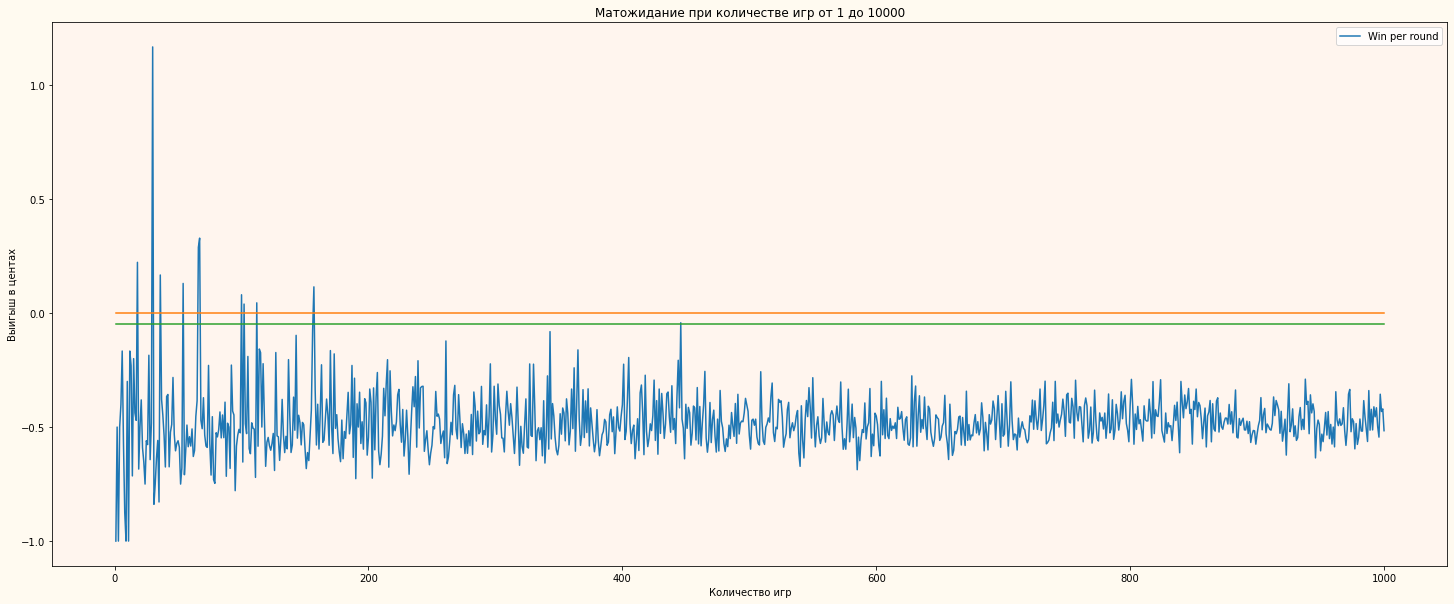

In [73]:
fig, ax = plt.subplots()

ax.plot(x_coord, y_coord, label="Win per round")
ax.plot(x_coord, y_zero_coord)
ax.plot(x_coord, y_m_coord)

ax.legend()

ax.set_facecolor('seashell')
fig.set_figwidth(25)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.title('Матожидание при количестве игр от 1 до ' + str(trials))
plt.xlabel('Количество игр')
plt.ylabel('Выигыш в центах')
plt.show()

Отлично. Теперь мы видим, что, за исключением нескольких отдельных выбросов (вполне объяснимых) в самом начале при малом числе испытаний, на длительном интервале казино всегда в выигрыше, причем средний выигрыш не только не превосходит ноль,но на длинной дистанции не превосходит и мат.ожидания(зеленая линия).  
Можно было бы еще тривиально усовершенствовать модель, что бы она выдавала, после какой ставки в среднем мы разоримся, в зависимости от доступной начальной суммы, или написать рулетку, но, в принципе, это все несложные и  не очень интеерсные задачи. 